### DB0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Load the training data
X_train = np.load('./db/X_train.npy')
y_train = np.load('./db/Y_train.npy')

# Load the testing data
X_test = np.load('./db/X_test.npy')
y_test = np.load('./db/Y_test.npy')


In [3]:
def perceptron(X, y, lr=0.1, max_iter=100):
    # Initialize the weights to small random values
    w = np.random.rand(X.shape[1])
    # Initialize bias
    b = np.random.rand()

    # Train the perceptron
    for i in range(max_iter):
        for j in range(X.shape[0]):
            # Calculate the predicted output
            y_pred = np.dot(X[j], w) + b
            
            # Update the weights and bias if the example is misclassified
            if y_pred > 0 and y[j] == 0:
                w -= lr * X[j]
                b -= lr
            elif y_pred <= 0 and y[j] == 1:
                w += lr * X[j]
                b += lr

    # Calculate the boundary line
    x1 = np.array([np.min(X[:,0]), np.max(X[:,0])])
    x2 = (-w[0] * x1 - b) / w[1]

    return w, b, x1, x2

In [4]:
def predict(X, w, b = 0):
    # Calculate the predicted outputs for the input data
    y_pred = np.dot(X, w) + b
    # Apply the step function to obtain the final predictions
    return np.where(y_pred > 0, 1, 0)

def transform(array1):
    
    r_train = np.sqrt(np.sum(array1**2, axis=1))
    theta_train = np.arctan2(array1[:,1], array1[:,0])

    # Convert the polar coordinates back to Cartesian coordinates
    array_output = np.column_stack((r_train*np.cos(theta_train), r_train*np.sin(theta_train)))
    
#     cartesian_x = []
#     cartesian_y = []
#     for i, j, in zip(array1, array2):
#         x, y = cart2pol(i, j)
#         cartesian_x.append(x)
#         cartesian_y.append(y)
    return array_output

In [5]:
w, b, x1, x2  = perceptron(X_train, y_train)

In [6]:
X_train = transform(X_train)

Text(0.5, 1.0, 'Dados de Treino')

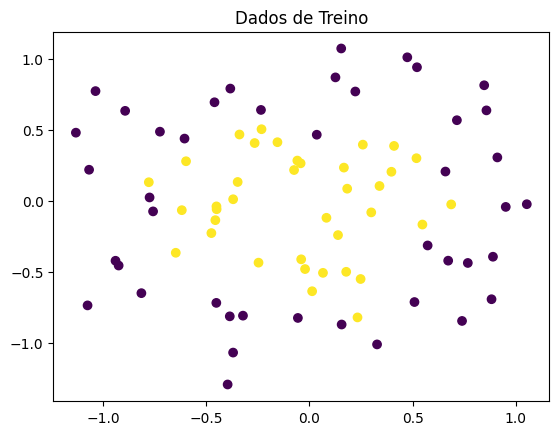

In [7]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title('Dados de Treino')


In [8]:
# Predict the output categories for the test data
X_test = transform(X_test)
y_pred = predict(X_test, w)

Text(0.5, 1.0, 'Dados de Teste')

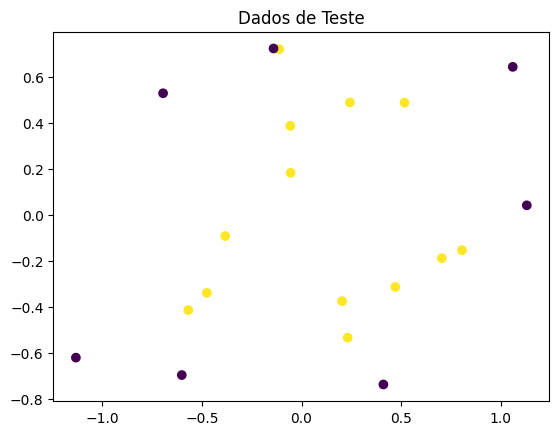

In [9]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title('Dados de Teste')

In [10]:
# Print the accuracy of the predictions
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6


### DB1

In [11]:
X_train = np.load('./db1/X_train.npy')
X_test = np.load('./db1/X_test.npy')
y_train = np.load('./db1/y_train.npy')
y_test = np.load('./db1/y_test.npy')

In [12]:
X_train = transform(X_train)

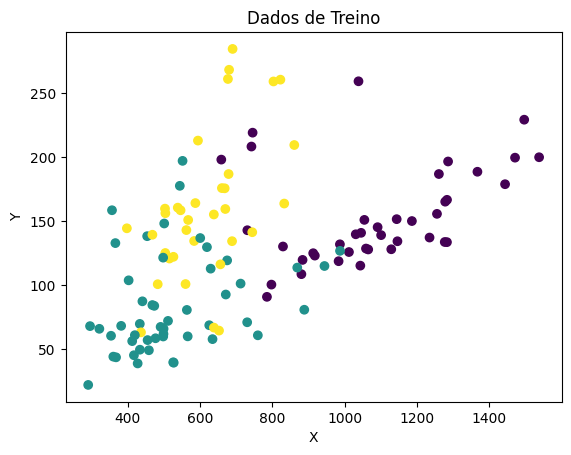

In [13]:
# Plota o gráfico
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title('Dados de Treino')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [14]:
# Train the perceptron
w, b, r_boundary, theta_boundary = perceptron(X_train, y_train, lr=0.1, max_iter=100)


In [15]:
X_test = transform(X_test)
y_pred = predict(X_test, w, b)

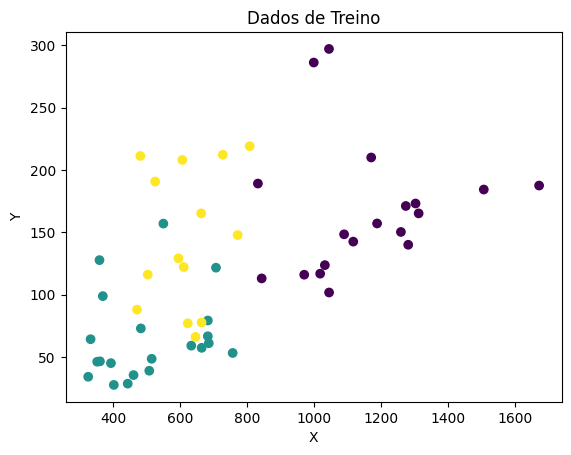

In [16]:
# Plota o gráfico
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title('Dados de Treino')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [17]:
# Print the accuracy of the predictions
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.37037037037037035
